# DATA QUALITY

In [46]:
import numpy as np
import pandas as pd
from janitor import clean_names
%config IPCompleter.greedy=True

## UPLOAD DATA

In [47]:
path = '../../'

In [48]:
name_data_file = 'work.csv'

In [49]:
full_path = path + '/02_Data/03_Work/' + name_data_file
df = pd.read_csv(full_path,parse_dates=['date'],index_col='date')
df

,state_id,store_id,dept_id,cat_id,item_id,wm_yr_wk,d,sales,sell_price,year,month,wday,weekday,event_name_1,event_type_1,event_name_2,event_type_2
date,,,,,,,,,,,,,,,,,
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_090,11249,d_704,0,1.25,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_120,11249,d_704,0,4.98,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_202,11249,d_704,20,4.28,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_252,11249,d_704,34,1.48,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_288,11249,d_704,0,NaN,2013,1,4,Tuesday,NewYear,National,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-30,CA,CA_4,FOODS_3,FOODS,FOODS_3_329,11544,d_1767,5,2.98,2015,11,3,Monday,NaN,NaN,NaN,NaN
2015-11-30,CA,CA_4,FOODS_3,FOODS,FOODS_3_555,11544,d_1767,4,1.68,2015,11,3,Monday,NaN,NaN,NaN,NaN
2015-11-30,CA,CA_4,FOODS_3,FOODS,FOODS_3_586,11544,d_1767,9,1.68,2015,11,3,Monday,NaN,NaN,NaN,NaN


## OVERVIEW

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21280 entries, 2013-01-01 to 2015-11-30
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state_id      21280 non-null  object 
 1   store_id      21280 non-null  object 
 2   dept_id       21280 non-null  object 
 3   cat_id        21280 non-null  object 
 4   item_id       21280 non-null  object 
 5   wm_yr_wk      21280 non-null  int64  
 6   d             21280 non-null  object 
 7   sales         21280 non-null  int64  
 8   sell_price    21209 non-null  float64
 9   year          21280 non-null  int64  
 10  month         21280 non-null  int64  
 11  wday          21280 non-null  int64  
 12  weekday       21280 non-null  object 
 13  event_name_1  1700 non-null   object 
 14  event_type_1  1700 non-null   object 
 15  event_name_2  60 non-null     object 
 16  event_type_2  60 non-null     object 
dtypes: float64(1), int64(5), object(11)
memory usage: 2.

## DATA TYPE

In [51]:
df.dtypes

state_id         object
store_id         object
dept_id          object
cat_id           object
item_id          object
wm_yr_wk          int64
d                object
sales             int64
sell_price      float64
year              int64
month             int64
wday              int64
weekday          object
event_name_1     object
event_type_1     object
event_name_2     object
event_type_2     object
dtype: object

Conclutión: 

* year, month, and wday have to change to categorical type

### Correction

In [52]:
df = df.astype({'year':'O',
               'month': 'O',
               'wday': 'O'})

df.dtypes

state_id         object
store_id         object
dept_id          object
cat_id           object
item_id          object
wm_yr_wk          int64
d                object
sales             int64
sell_price      float64
year             object
month            object
wday             object
weekday          object
event_name_1     object
event_type_1     object
event_name_2     object
event_type_2     object
dtype: object

## UNIQUE VALUES

In [53]:
df.nunique().sort_values()

state_id           1
cat_id             1
dept_id            1
event_type_2       2
store_id           2
event_name_2       3
year               3
event_type_1       4
wday               7
weekday            7
item_id           10
month             12
sell_price        23
event_name_1      30
wm_yr_wk         153
sales            301
d               1064
dtype: int64

In [54]:
df.drop(columns = ['state_id','cat_id','dept_id'], inplace = True)

## DUPLICATED

In [55]:
df.duplicated().sum()

0

## SEPARATE DATASETS, NUMERICAL AND CATEGORICAL TYPES

### Categorical

In [56]:
cat = df.select_dtypes(exclude = 'number').copy()

### Numerical

In [57]:
num = df.select_dtypes(include='number').copy()

## CATEGORICAL MANAGEMENT

### Null

In [58]:
cat.isna().sum().sort_values(ascending = False)

event_name_2    21220
event_type_2    21220
event_name_1    19580
event_type_1    19580
store_id            0
item_id             0
d                   0
year                0
month               0
wday                0
weekday             0
dtype: int64

### Inspect the null values

In [59]:
cat.event_name_1.value_counts(dropna=False)### Null

NaN                    19580
NewYear                   60
Mother's day              60
Thanksgiving              60
VeteransDay               60
Halloween                 60
EidAlAdha                 60
ColumbusDay               60
LaborDay                  60
Eid al-Fitr               60
Ramadan starts            60
IndependenceDay           60
NBAFinalsEnd              60
NBAFinalsStart            60
MemorialDay               60
Pesach End                60
Easter                    60
StPatricksDay             60
Purim End                 60
LentWeek2                 60
PresidentsDay             60
ValentinesDay             60
LentStart                 60
SuperBowl                 60
MartinLutherKingDay       60
OrthodoxChristmas         60
OrthodoxEaster            40
Father's day              40
Chanukah End              40
Christmas                 40
Cinco De Mayo             40
Name: event_name_1, dtype: int64

In [60]:
cat.event_name_2.value_counts(dropna=False)

NaN               21220
Cinco De Mayo        20
OrthodoxEaster       20
Father's day         20
Name: event_name_2, dtype: int64

In [61]:
cat.event_type_1.value_counts(dropna=False)

NaN          19580
National       580
Religious      560
Cultural       380
Sporting       180
Name: event_type_1, dtype: int64

In [62]:
cat.event_type_2.value_counts(dropna=False)

NaN          21220
Cultural        40
Religious       20
Name: event_type_2, dtype: int64

In [63]:
pd.crosstab(index=cat['event_name_1'], columns=cat['event_name_2'])

event_name_2,Cinco De Mayo,Father's day,OrthodoxEaster
event_name_1,,,
Easter,0,0,20
NBAFinalsEnd,0,20,0
OrthodoxEaster,20,0,0


Conclutions:

* event_name_2 has events that are already included in event_name_1
  but then when crossing them they don't match.
* drop event_name_2 and event_type_2.
* for nulls for event_name_1 and event_type_1 is clear that they are days "with no special days", so     wull be drop.

In [64]:
cat.drop(columns = ['event_name_2','event_type_2'],inplace = True)

##### Impute by value

In [65]:
var_impute_value = ['event_name_1','event_type_1']

In [66]:
value = 'No_event'

###### Impute

In [67]:
cat[var_impute_value] = cat[var_impute_value].fillna(value)

Check

In [68]:
cat.isna().sum().sort_values(ascending = False)

store_id        0
item_id         0
d               0
year            0
month           0
wday            0
weekday         0
event_name_1    0
event_type_1    0
dtype: int64

### OUTLIERS IDENTIFICATION

In [69]:
for variable in cat:
    print(variable + '\n')
    print(cat[variable].value_counts(dropna = False))
    print('\n\n')

store_id

CA_3    10640
CA_4    10640
Name: store_id, dtype: int64



item_id

FOODS_3_090    2128
FOODS_3_120    2128
FOODS_3_202    2128
FOODS_3_252    2128
FOODS_3_288    2128
FOODS_3_329    2128
FOODS_3_555    2128
FOODS_3_586    2128
FOODS_3_587    2128
FOODS_3_714    2128
Name: item_id, dtype: int64



d

d_704     20
d_1418    20
d_1404    20
d_1405    20
d_1406    20
          ..
d_1064    20
d_1065    20
d_1066    20
d_1067    20
d_1767    20
Name: d, Length: 1064, dtype: int64



year

2013    7300
2014    7300
2015    6680
Name: year, dtype: int64



month

1     1860
3     1860
5     1860
7     1860
8     1860
10    1860
4     1800
6     1800
9     1800
11    1800
2     1680
12    1240
Name: month, dtype: int64



wday

4    3040
5    3040
6    3040
7    3040
1    3040
2    3040
3    3040
Name: wday, dtype: int64



weekday

Tuesday      3040
Wednesday    3040
Thursday     3040
Friday       3040
Saturday     3040
Sunday       3040
Monday       3040
Name: weekday, dtype: int

Conclution:

* There are no variables with rare categories
* There are months with fewer records, this may be because they are the months with less than 31 days
* 2015 has fewer records, will they be the validation ones or are there more?

Check.

In [70]:
df.groupby('year').d.nunique()

year
2013    365
2014    365
2015    334
Name: d, dtype: int64

31 days left.
Let's see which ones.

In [71]:
pd.date_range(start = '2015-01-01', end = '2015-12-31' ).difference(df.loc['2015'].index)

DatetimeIndex(['2015-12-01', '2015-12-02', '2015-12-03', '2015-12-04',
               '2015-12-05', '2015-12-06', '2015-12-07', '2015-12-08',
               '2015-12-09', '2015-12-10', '2015-12-11', '2015-12-12',
               '2015-12-13', '2015-12-14', '2015-12-15', '2015-12-16',
               '2015-12-17', '2015-12-18', '2015-12-19', '2015-12-20',
               '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
               '2015-12-25', '2015-12-26', '2015-12-27', '2015-12-28',
               '2015-12-29', '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', freq=None)

Is the validation data, everything is right.

## NUMERICAL MANAGEMENT

### Estats

In [72]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
wm_yr_wk,21280.0,11415.022556,82.874752,11249.0,11335.0,11420.00,11506.00,11544.00
sales,21280.0,28.874577,38.988147,0.0,6.0,18.00,37.00,763.00
sell_price,21209.0,2.397254,1.237024,1.0,1.5,1.58,2.98,4.98


### Null

In [73]:
num.isna().sum().sort_values(ascending = False)

sell_price    71
wm_yr_wk       0
sales          0
dtype: int64

sell_price is a relevat variable, lets see if we find a pattern.

In [74]:
#Pby product
df.groupby('item_id').apply(lambda x: x.sell_price.isna().sum()).sort_values(ascending=False)

item_id
FOODS_3_288    71
FOODS_3_090     0
FOODS_3_120     0
FOODS_3_202     0
FOODS_3_252     0
FOODS_3_329     0
FOODS_3_555     0
FOODS_3_586     0
FOODS_3_587     0
FOODS_3_714     0
dtype: int64

In [76]:
#By sell levels.
df.groupby('sales').apply(lambda x: x.sell_price.isna().sum()).sort_values(ascending=False)

sales
0      71
210     0
207     0
206     0
205     0
       ..
100     0
99      0
98      0
97      0
763     0
Length: 301, dtype: int64

It only happens on one product and only on days when there are no sales.

Clearly the reason is that if there are no sales, he does not set the price.

We have to correct this, as it is artificial:

* The product has a price even if there were no sales that day

What would make more sense is to impute those nulls by the first valid value above SEGMENTED BY PRODUCT.

But it could happen that the first day of a product had zero sales, which would drag the nulls forward without solving the problem.

So we are going to impute for the most frequent value of the price of EACH PRODUCT (the mode).

This adds complexity, since we need the product that we don't have in num.

So we have to include it temporarily and then remove it.

##### Add Product

In [77]:
num = pd.concat([num,cat.item_id], axis = 1)
num

,wm_yr_wk,sales,sell_price,item_id
date,,,,
2013-01-01,11249,0,1.25,FOODS_3_090
2013-01-01,11249,0,4.98,FOODS_3_120
2013-01-01,11249,20,4.28,FOODS_3_202
2013-01-01,11249,34,1.48,FOODS_3_252
2013-01-01,11249,0,NaN,FOODS_3_288
...,...,...,...,...
2015-11-30,11544,5,2.98,FOODS_3_329
2015-11-30,11544,4,1.68,FOODS_3_555
2015-11-30,11544,9,1.68,FOODS_3_586


#### Correct de sell_price nulls

##### Calculate the most frequent price by product and impute

In [78]:
def impute_mode(records):
    #Calculate price mode in the product.
    mode = records.sell_price.mode()[0]
    #Impute nulls
    records.loc[records.sell_price.isna(),'sell_price'] = mode
    return(records)

num = num.groupby('item_id').apply(impute_mode)

C:\Users\luise\AppData\Local\Temp\ipykernel_8776\1848995048.py:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  num = num.groupby('item_id').apply(impute_mode)


To verify that the imputation has been made by product, we can review the different price values in each product and see that there is no big jump, for example a jump from 3 to 10.

In [79]:
num.groupby('item_id').sell_price.value_counts()

item_id      sell_price
FOODS_3_090  1.48           658
             1.38           546
             1.44           504
             1.00           280
             1.50            90
             1.25            50
FOODS_3_120  4.98          2128
FOODS_3_202  4.58           727
             4.38           525
             4.28           386
             3.98           350
             3.00           105
             3.33            21
             3.25             7
             4.48             7
FOODS_3_252  1.58          1182
             1.48           946
FOODS_3_288  1.50          2100
             1.25            21
             1.18             7
FOODS_3_329  2.98          2079
             2.74            42
             1.98             7
FOODS_3_555  1.58          1149
             1.68           979
FOODS_3_586  1.58          1149
             1.68           979
FOODS_3_587  2.48          1644
             2.68           421
             1.98            63
FOODS_3_714  1.5

In [80]:
num.drop(columns = 'item_id',inplace=True)

In [81]:
num.head()

,wm_yr_wk,sales,sell_price
date,,,
2013-01-01,11249,0,1.25
2013-01-01,11249,33,1.25
2013-01-01,11249,0,4.98
2013-01-01,11249,0,4.98
2013-01-01,11249,20,4.28


### OUTLIERS

#### By standar deviation

In [82]:
num_std = 4 #number of standar deviation

###### Function that returns the indices of the outliers

In [83]:
def outliers_std(variable, num_std = 4):
    #drop nulls
    variable = variable.dropna()
    #calculate limits
    mean = np.mean(variable)
    sd = np.std(variable)
    treshold = sd * num_std
    lower_lim = mean - treshold
    upper_lim = mean + treshold
    #find outliers from limits
    indices = [indice for indice,value in variable.items() if value < lower_lim or value > upper_lim]
    return(indices)

###### Function that counts the number of outliers

In [84]:
def outliers_count(df,variable, num_std = 4):
    outliers = outliers_std(df[variable], num_std)
    return(df.loc[outliers,variable].value_counts())

In [85]:
var_outliers_dt = ['sales','sell_price'] ##variables to apply

###### Aplply

In [86]:
for variable in var_outliers_dt:
    print('\n' + variable + ':\n')
    print(outliers_count(num,variable,num_desv_tip))


sales:

0      518
1      103
5      100
10      95
7       92
      ... 
340      1
239      1
250      1
469      1
323      1
Name: sales, Length: 247, dtype: int64

sell_price:

Series([], Name: sell_price, dtype: int64)


Can be upper outliers.

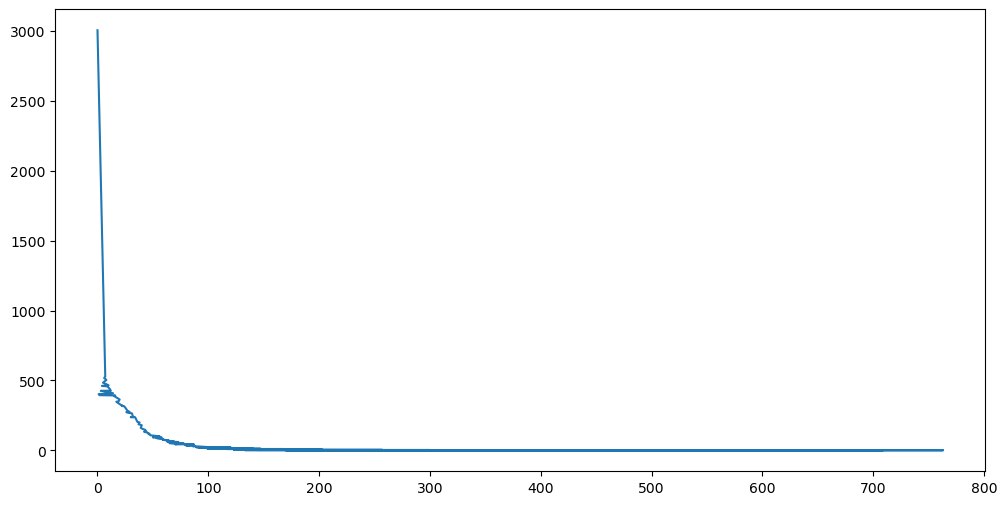

In [87]:
num.sales.value_counts().plot(figsize = (12,6));

Conclution:
    
* It is a clear example of a long tail, which is very common in retail
* Better not to do anything for now in terms of outliers, in EDA maybe we will see it better

## SAVE DATASETS AFTER DATA QUALITY

In [88]:
path_work = path + '/02_Data/03_Work/' + 'work_quality_results.pickle'
path_cat = path + '/02_Data/03_Work/' + 'cat_quality_results.pickle'
path_num = path + '/02_Data/03_Work/' + 'num_quality_results.pickle'

In [89]:
df.to_pickle(path_work)
cat.to_pickle(path_cat)
num.to_pickle(path_num)